<a href="https://colab.research.google.com/github/raihanrach/PCVK_Genap_2021/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gamma correction pada citra
---------------------------------
Masukkan nilai Gamma: 3


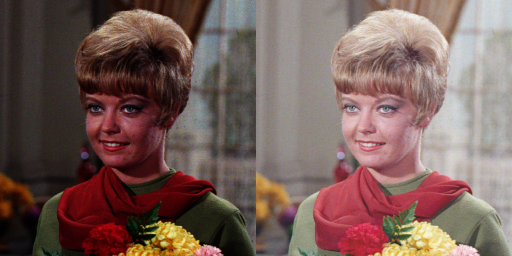

In [4]:
#nomer 1

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Salinan female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai db: 5


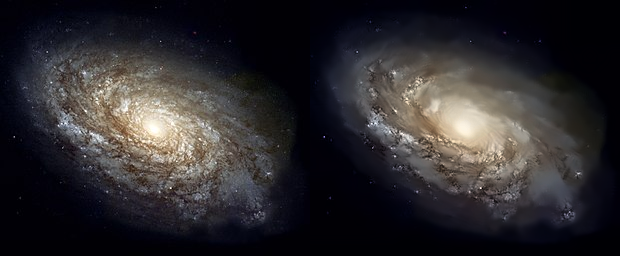

In [7]:
#nomer 3

from matplotlib import pyplot as plt

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  db = int(input('Masukkan nilai db: '))
except ValueError:
  print('Error, not a number')

img2 = cv.imread('/content/drive/MyDrive/images/galaxy.jpg')

# denoising of image saving it into dst image 
dst = cv.fastNlMeansDenoisingColored(img2, None, 10, db, 7, 15) 
  
# Plotting of source and destination image 
final_frame = cv.hconcat((img2, dst))
cv2_imshow(final_frame)